### **Behavioral Cloning** 

---

**Behavioral Cloning Project**

The goals / steps of this project are the following:
* Use the simulator to collect data of good driving behavior
* Build, a convolution neural network in Keras that predicts steering angles from images
* Train and validate the model with a training and validation set
* Test that the model successfully drives around track one without leaving the road
* Summarize the results with a written report


[//]: # (Image References)

[image1]: ./model-summary.png "Model Visualization"
[image2]: ./NVIDIA-CNN.png "NVIDIA Convolutional Neural Network Flow Chart"

## Rubric Points
### Here I will consider the [rubric points](https://review.udacity.com/#!/rubrics/432/view) individually and describe how I addressed each point in my implementation.  

---
### Files Submitted & Code Quality

### 1. Submission includes all required files and can be used to run the simulator in autonomous mode

My project includes the following files:
* model.py containing the script to create and train the model
* drive.py for driving the car in autonomous mode
* model.h5 containing a trained convolution neural network using NVIDIA's CNN structure
* utils.py containing the helper functions that aid in image preprocessing/processing to feed into model.py
* writeup_report.md summarizing the results


### 2. Submission includes functional code
Using the Udacity provided simulator and my drive.py file, the car can be driven autonomously around the track by executing and a series of images of the autonomous run will be saved in a directory called run1.
```sh
python drive.py model.h5 run1 
```
Also, using the Udacity provided simulator, video.py file and the run1 directory of images generated by the above-mentioned line of code, the following line of code will generate an .mp4 called run1 of the autonomous run
```sh
python video.py run1
```



### 3. Submission code is usable and readable

The model.py file contains the code for training and saving the convolution neural network. The file shows the pipeline I used for training and validating the model, and it contains comments to explain how the code works.

In order to run the code, make sure that you do the following:

1. Make sure to activate the right environment
    ```sh
    source activate carnd-term1
    ```
    
2. cd into the directory that contains the project
    ```sh
    cd ../../CarND-Behavioral-Cloning-P3/
    ```
    
3. Remove any python caches and model data you have in your directory
    ```sh
    rm model.h5
    rm -rf __pycache__
    mkdir data
    ```
    
4. Collect the data you need for testing by opening the mac simulator, pressing the record button, selecting the path in your current directory ../../CarND-Behavioral-Cloning-P3/data, pressing select, pressing record, and running around the track as slowly and as precisely as possible for 2-3 laps).

5. In the same directory from which you left off run the following line of code
    ```sh
    python model.py
    ```
    Then go get yourself a cup of coffee while your model is being trained.
    
6. After your model is trained, put your cup of coffee down and run the following line of code
    ```sh
    python drive.py model.h5 run1
    ```
    Then open your mac simulator and select "Autonomous Mode", and your car should be driving itself!!! Make sure to quit the autonomous driving from the terminal with CTRL-Z when the car successfully completes one lap around the track. Afterward, there will be in your current directory called run1 that contains the images of the successful run.

7. Finally, run the following line of code to generate an .mp4 file that creates a video out of the images found in the run1 directory.
    ```sh
    python video.py run1
    ```

### Model Architecture and Training Strategy

### 1. An appropriate model architecture has been employed

My model consists of a convolution neural network with 3x3 filter sizes and depths between 32 and 128 (model.py lines 33-53) 

The model includes ELU layers to introduce nonlinearity (code line 20), and the data is normalized in the model using a Keras lambda layer (code line 18). 

### 2. Attempts to reduce overfitting in the model

The model contains spatial dropout and dropout layers in order to reduce overfitting (model.py lines 37 and 48). 

The model was trained and validated on different data sets to ensure that the model was not overfitting (code line 10-16). The model was tested by running it through the simulator and ensuring that the vehicle could stay on the track.

### 3. Model parameter tuning

The model used an adam optimizer, so the learning rate (LEARNING_RATE = 0.001) was not tuned manually (model.py line 55).

### 4. Appropriate training data

Training data was chosen to keep the vehicle driving on the road. I used a combination of center lane driving, recovering from the left and right sides of the road ... 

For details about how I created the training data, see the next section. 

### Model Architecture and Training Strategy

#### 1. Solution Design Approach

The overall strategy for deriving a model architecture was to essentially follow NVIDIA's Convolutional Neural Network model as explained and illustrated in the following link: http://images.nvidia.com/content/tegra/automotive/images/2016/solutions/pdf/end-to-end-dl-using-px.pdf

In order to gauge how well the model was working, I split my image and steering angle data into a training and validation set. I found that my first model had a low mean squared error on the training set but a high mean squared error on the validation set. This implied that the model was overfitting. To combat overfitting, the NVIDIA model suggests to use Spatial Dropout and Dropout in a few of the network's layers.

The final step was to run the simulator to see how well the car was driving around track one.

At the end of the process, the vehicle is able to drive autonomously around the track without leaving the road.

#### 2. Final Model Architecture

The final model architecture (model.py lines 33-53) consisted of a convolution neural network with the following layers and layer sizes ...

Here is a visualization of the architecture (note: visualizing the architecture is optional according to the project rubric):

![alt text][image2]


Below is a summary of the above-mentioned architecture:

![alt text][image1]

#### 3. Creation of the Training Set & Training Process
In order to create a robust and manageable training set, I had to use a training process that was conducive to a successful run. A successful run is the car autonomously completing a lap aroudn the track at least once.

First, I started by recording my run, completing 3 laps while driving along the center as perfectly and as precisely as possible (which caused me to drive at a slower speed as my simulator was jittery whenever I changed the steering angle). This allowed me to capture a ton of image data, which I then augmented by cropping the images (truncating the upper, unnecessary half of each image), randomly flipping images, translating images, and shifting steering values by a bias of +/- 0.25 (+0.25 for a left image, -0.25 for a right image, and 0.00 for a center image).

I shuffled the data set, put them into a validation set, and finally used these training data for the NVIDIA Convolutional Neural Network model. I used an Adam Optimizer with a learning rate of 0.001, a batch size of 64, and ran the model for 50 epochs.

In the below image processing and visualization section, I go over how I processed the image data before running them through the NVIDIA Convolutional Neural Network model.

## Image Processing and Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
## Load data from data/driving_log.csv" into a data frame
csv_df = pd.read_csv("data/driving_log.csv", index_col=False)

# Data Frame Columns from csv files
csv_df.columns = ['center', 'left', 'right', 'steer', 'throttle', 'brake', 'speed']

## Sample
csv_df = csv_df.sample(n=len(csv_df))

## Training and Validation Data
training_count = int(0.8 * len(csv_df))
training_data, validation_data = csv_df[:training_count].reset_index(), csv_df[training_count:].reset_index()


## Step 1: Crop Image

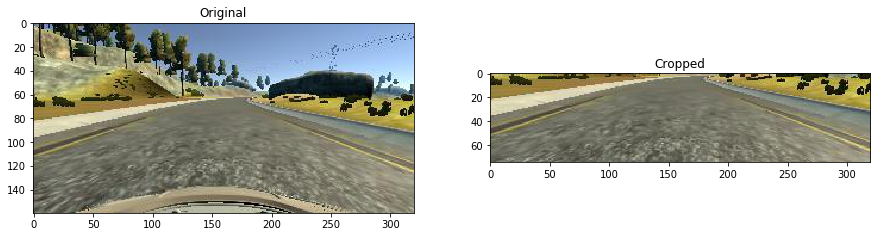

In [3]:
fig = plt.figure(figsize=(15,15))

center_img_path = "/Users/umarqattan/Desktop/CarND-Behavioral-Cloning-P3/data/"+training_data['center'].iloc[5].strip()
left_img_path = "/Users/umarqattan/Desktop/CarND-Behavioral-Cloning-P3/data/"+training_data['left'].iloc[5].strip()
right_img_path = "/Users/umarqattan/Desktop/CarND-Behavioral-Cloning-P3/data/"+training_data['right'].iloc[5].strip()




plt.subplot(1,2,1)
img = plt.imread(center_img_path)
plt.imshow(img)
plt.title('Original')

plt.subplot(1,2,2)
img = plt.imread(center_img_path)
plt.imshow(img[60:135, : ])
plt.title('Cropped')

## Step 2: Flip Images

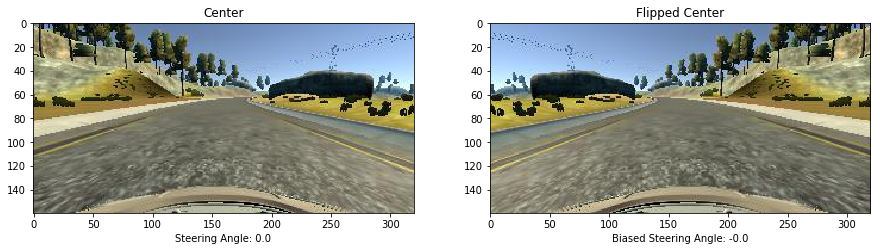

In [4]:

fig = plt.figure(figsize=(15,15))


plt.subplot(1,2,1)
img = plt.imread(center_img_path)
plt.imshow(img)
plt.title('Center')
plt.xlabel('Steering Angle: ' + str(training_data['steer'].iloc[10]))

plt.subplot(1,2,2)
img = plt.imread(center_img_path)
plt.imshow(np.fliplr(img))
plt.title('Flipped Center')
plt.xlabel('Biased Steering Angle: ' + str(-training_data['steer'].iloc[10]))

## Step 3: Add Bias to Steer Angle

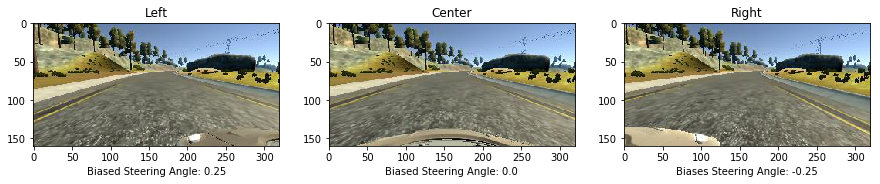

In [5]:
fig = plt.figure(figsize=(15,15))


plt.subplot(1,3,1)
img = plt.imread(left_img_path)
plt.imshow(img)
plt.title('Left')
plt.xlabel('Biased Steering Angle: ' + str(training_data['steer'].iloc[10] + 0.25))

plt.subplot(1,3,2)
img = plt.imread(center_img_path)
plt.imshow(img)
plt.title('Center')
plt.xlabel('Biased Steering Angle: ' + str(training_data['steer'].iloc[10]))


plt.subplot(1,3,3)
img = plt.imread(right_img_path)
plt.imshow(img)
plt.title('Right')
plt.xlabel('Biases Steering Angle: ' + str(training_data['steer'].iloc[10] - 0.25))

## Step 4: Translate Images

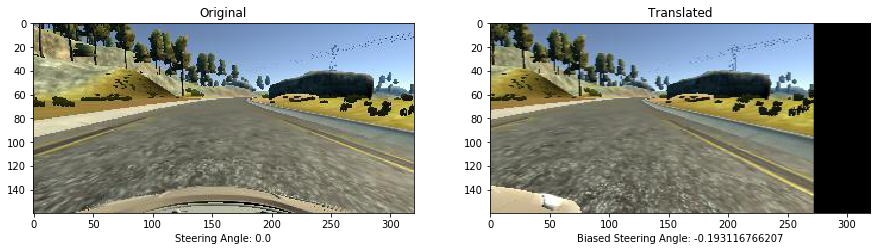

In [6]:
import cv2
fig = plt.figure(figsize=(15,15))
def trans_image(image, steer):
    """ Returns translated image and 
    corrsponding steering angle.
    """
    trans_range = 100
    tr_x = trans_range * np.random.uniform() - trans_range / 2
    steer_ang = steer + tr_x / trans_range * 2 * .2
    tr_y = 0
    M = np.float32([[1, 0, tr_x], [0, 1, tr_y]])
    image_tr = cv2.warpAffine(image, M, (320,160))
    return image_tr, steer_ang


steer_ang = training_data['steer'].iloc[10]
new_img, new_steer_ang = trans_image(img, steer_ang)

plt.subplot(1,2,1)
img = plt.imread(center_img_path)
plt.imshow(img)
plt.title('Original')
plt.xlabel('Steering Angle: ' + str(steer_ang))

plt.subplot(1,2,2)
plt.imshow(new_img)
plt.title('Translated')
plt.xlabel('Biased Steering Angle: ' + str(new_steer_ang))

# Conclusions 

Ways to improve the data collection process include:
    1. Drive the car around the track in reverse
    2. Drive the car along the right side of the track but just within the track bounds
    3. Drive the car along the left side of the track but just within the track bounds
    4. Add a lambda layer in the NVIDIA Convolutional Neural Network model to accomodate cropping of the images 
       so as speed up the training process.